# Import libraries

In [25]:
import numpy as np
from tqdm import tqdm
import pandas as pd
import cv2
import os

from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Read dataset

In [2]:
p = os.getcwd()
print(p)

os.system(p)
os.chdir("..")
d = os.getcwd()
print(d)

dirname = os.path.dirname(d)
csvfile = os.path.join(d, 'datasets/celeba/labels.csv')
dirname = os.path.dirname(d)
imgfile = os.path.join(d, 'datasets/celeba/img/')


dataset = pd.read_csv(csvfile, sep='\\t', engine='python')
dataset.head

/Users/mel/Documents/MRes/Machine Learning/Assignment/AMLS_20-21_SN12345678/A2
/Users/mel/Documents/MRes/Machine Learning/Assignment/AMLS_20-21_SN12345678


<bound method NDFrame.head of       img_name  gender  smiling
0        0.jpg      -1        1
1        1.jpg      -1        1
2        2.jpg       1       -1
3        3.jpg      -1       -1
4        4.jpg      -1       -1
...        ...     ...      ...
4995  4995.jpg       1        1
4996  4996.jpg       1        1
4997  4997.jpg       1        1
4998  4998.jpg       1        1
4999  4999.jpg       1        1

[5000 rows x 3 columns]>

# Preprocess data

In [3]:
#Load images 50% of original size
dataset_image = []
for i in tqdm(range(dataset.shape[0])):
    img = image.load_img(imgfile+dataset['img_name'][i], target_size=(109,89))
    img = img.convert('L')
    img = image.img_to_array(img)
    img = img/255

    dataset_image.append(img)

100%|██████████| 5000/5000 [00:14<00:00, 333.58it/s]


# Load and split data

In [4]:
# Load the data
x = np.array(dataset_image)
y = np.array(dataset['smiling']+1)/2

In [5]:
# Split the data into training and testing(75% training and 25% testing data)
x_train, x_test, y_train, y_test = train_test_split(x, y,shuffle=False,random_state=0)

In [6]:
x.shape

(5000, 109, 89, 1)

In [7]:
#Change data type to 'float32'
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Optimise batch size

In [25]:
#Evaluate batch size = 128

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/50
30/30 [==============================] - 22s 741ms/step - loss: 0.6634 - accuracy: 0.6240 - val_loss: 0.6181 - val_accuracy: 0.6816
Epoch 2/50
30/30 [==============================] - 22s 744ms/step - loss: 0.4112 - accuracy: 0.8171 - val_loss: 2.4620 - val_accuracy: 0.4352
Epoch 3/50
30/30 [==============================] - 23s 755ms/step - loss: 0.1740 - accuracy: 0.9331 - val_loss: 0.8430 - val_accuracy: 0.5184
Epoch 4/50
30/30 [==============================] - 24s 811ms/step - loss: 0.0715 - accuracy: 0.9843 - val_loss: 0.3910 - val_accuracy: 0.8344
Epoch 5/50
30/30 [==============================] - 23s 760ms/step - loss: 0.0369 - accuracy: 0.9968 - val_loss: 0.4825 - val_accuracy: 0.7632
Epoch 6/50
30/30 [==============================] - 22s 743ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.3818 - val_accuracy: 0.8232
Epoch 7/50
30/30 [==============================] - 23s 756ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.4109 - val_accuracy: 0.7928

In [26]:
#Evaluate batch size = 64

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/50
59/59 [==============================] - 24s 399ms/step - loss: 0.5823 - accuracy: 0.7163 - val_loss: 0.9045 - val_accuracy: 0.5040
Epoch 2/50
59/59 [==============================] - 24s 398ms/step - loss: 0.2129 - accuracy: 0.9101 - val_loss: 0.4250 - val_accuracy: 0.8056
Epoch 3/50
59/59 [==============================] - 23s 395ms/step - loss: 0.0796 - accuracy: 0.9763 - val_loss: 0.3770 - val_accuracy: 0.8408
Epoch 4/50
59/59 [==============================] - 23s 388ms/step - loss: 0.0365 - accuracy: 0.9957 - val_loss: 0.3369 - val_accuracy: 0.8616
Epoch 5/50
59/59 [==============================] - 23s 396ms/step - loss: 0.0168 - accuracy: 0.9987 - val_loss: 0.4245 - val_accuracy: 0.8152
Epoch 6/50
59/59 [==============================] - 23s 391ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.4095 - val_accuracy: 0.8416
Epoch 7/50
59/59 [==============================] - 24s 400ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.3953 - val_accuracy: 0.8544

In [ ]:
#Evaluate batch size = 256

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
model.fit(x_train, y_train, batch_size=256, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
15/15 [==============================] - 30s 2s/step - loss: 1.1199 - accuracy: 0.5293 - val_loss: 1.7908 - val_accuracy: 0.4832
Epoch 2/100
15/15 [==============================] - 32s 2s/step - loss: 0.6579 - accuracy: 0.6339 - val_loss: 0.6178 - val_accuracy: 0.6536
Epoch 3/100
15/15 [==============================] - 50s 3s/step - loss: 0.4939 - accuracy: 0.7803 - val_loss: 0.5999 - val_accuracy: 0.6736
Epoch 4/100
15/15 [==============================] - 47s 3s/step - loss: 0.3025 - accuracy: 0.8747 - val_loss: 0.6600 - val_accuracy: 0.6064
Epoch 5/100
15/15 [==============================] - 44s 3s/step - loss: 0.2031 - accuracy: 0.9203 - val_loss: 0.7609 - val_accuracy: 0.5136
Epoch 6/100
15/15 [==============================] - 44s 3s/step - loss: 0.1235 - accuracy: 0.9608 - val_loss: 0.7435 - val_accuracy: 0.4896
Epoch 7/100
15/15 [==============================] - 45s 3s/step - loss: 0.0713 - accuracy: 0.9872 - val_loss: 0.5422 - val_accuracy: 0.7120
Epoch 8/100
1

In [9]:
#Batch size 64 achieves the highest accuracy so is selected

# Optimise optimiser

In [8]:
#Evaluate using SGD optimser

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='SGD')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
59/59 [==============================] - 24s 414ms/step - loss: 0.5874 - accuracy: 0.7125 - val_loss: 0.6445 - val_accuracy: 0.7704
Epoch 2/100
59/59 [==============================] - 25s 419ms/step - loss: 0.3130 - accuracy: 0.8739 - val_loss: 0.6645 - val_accuracy: 0.4728
Epoch 3/100
59/59 [==============================] - 22s 378ms/step - loss: 0.1958 - accuracy: 0.9349 - val_loss: 0.5799 - val_accuracy: 0.7816
Epoch 4/100
59/59 [==============================] - 22s 380ms/step - loss: 0.1348 - accuracy: 0.9667 - val_loss: 0.5288 - val_accuracy: 0.8152
Epoch 5/100
59/59 [==============================] - 23s 381ms/step - loss: 0.0966 - accuracy: 0.9848 - val_loss: 0.4880 - val_accuracy: 0.8208
Epoch 6/100
59/59 [==============================] - 22s 377ms/step - loss: 0.0697 - accuracy: 0.9952 - val_loss: 0.4469 - val_accuracy: 0.8016
Epoch 7/100
59/59 [==============================] - 21s 364ms/step - loss: 0.0521 - accuracy: 0.9979 - val_loss: 0.3794 - val_accuracy:

In [9]:
#Evaluate using 'RMSprop' optimser

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='RMSprop')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
59/59 [==============================] - 28s 482ms/step - loss: 0.5164 - accuracy: 0.7440 - val_loss: 0.8702 - val_accuracy: 0.5136
Epoch 2/100
59/59 [==============================] - 28s 473ms/step - loss: 0.2053 - accuracy: 0.9157 - val_loss: 0.5853 - val_accuracy: 0.6760
Epoch 3/100
59/59 [==============================] - 39s 660ms/step - loss: 0.1064 - accuracy: 0.9677 - val_loss: 0.4153 - val_accuracy: 0.7968
Epoch 4/100
59/59 [==============================] - 29s 498ms/step - loss: 0.0592 - accuracy: 0.9877 - val_loss: 0.3399 - val_accuracy: 0.8632
Epoch 5/100
59/59 [==============================] - 28s 480ms/step - loss: 0.0265 - accuracy: 0.9949 - val_loss: 0.4047 - val_accuracy: 0.8400
Epoch 6/100
59/59 [==============================] - 27s 456ms/step - loss: 0.0217 - accuracy: 0.9973 - val_loss: 0.4227 - val_accuracy: 0.8256
Epoch 7/100
59/59 [==============================] - 27s 458ms/step - loss: 0.0183 - accuracy: 0.9992 - val_loss: 0.8175 - val_accuracy:

In [10]:
#Adam has highest accuracy so is selected

# Investigating number of convolutional layers

In [22]:
#add second convolutional layer

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='Adam')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
59/59 [==============================] - 64s 1s/step - loss: 0.5643 - accuracy: 0.7269 - val_loss: 0.8117 - val_accuracy: 0.5384
Epoch 2/100
59/59 [==============================] - 61s 1s/step - loss: 0.2645 - accuracy: 0.8915 - val_loss: 0.3941 - val_accuracy: 0.8208
Epoch 3/100
59/59 [==============================] - 59s 1s/step - loss: 0.1766 - accuracy: 0.9381 - val_loss: 0.8329 - val_accuracy: 0.6152
Epoch 4/100
59/59 [==============================] - 60s 1s/step - loss: 0.1191 - accuracy: 0.9643 - val_loss: 0.9321 - val_accuracy: 0.6376
Epoch 5/100
59/59 [==============================] - 60s 1s/step - loss: 0.0534 - accuracy: 0.9920 - val_loss: 0.3393 - val_accuracy: 0.8504
Epoch 6/100
59/59 [==============================] - 60s 1s/step - loss: 0.0299 - accuracy: 0.9984 - val_loss: 0.3556 - val_accuracy: 0.8440
Epoch 7/100
59/59 [==============================] - 61s 1s/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.3650 - val_accuracy: 0.8464
Epoch 8/100
5

In [11]:
#add 3rd convolutional layer

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='Adam')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
59/59 [==============================] - 104s 2s/step - loss: 0.4494 - accuracy: 0.7749 - val_loss: 1.3511 - val_accuracy: 0.5728
Epoch 2/100
59/59 [==============================] - 96s 2s/step - loss: 0.2299 - accuracy: 0.9045 - val_loss: 0.3186 - val_accuracy: 0.8632
Epoch 3/100
59/59 [==============================] - 95s 2s/step - loss: 0.1304 - accuracy: 0.9520 - val_loss: 0.6533 - val_accuracy: 0.7312
Epoch 4/100
59/59 [==============================] - 99s 2s/step - loss: 0.0747 - accuracy: 0.9771 - val_loss: 0.8678 - val_accuracy: 0.6960
Epoch 5/100
59/59 [==============================] - 94s 2s/step - loss: 0.0305 - accuracy: 0.9957 - val_loss: 0.3910 - val_accuracy: 0.8472
Epoch 6/100
59/59 [==============================] - 95s 2s/step - loss: 0.0138 - accuracy: 0.9987 - val_loss: 0.3942 - val_accuracy: 0.8496
Epoch 7/100
59/59 [==============================] - 95s 2s/step - loss: 0.0090 - accuracy: 0.9992 - val_loss: 0.4160 - val_accuracy: 0.8472
Epoch 8/100


# Investigating number of hidden layers

In [18]:
#Evaluating 2 hidden layers

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='Adam')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
59/59 [==============================] - 106s 2s/step - loss: 0.4996 - accuracy: 0.7309 - val_loss: 0.4083 - val_accuracy: 0.8192
Epoch 2/100
59/59 [==============================] - 105s 2s/step - loss: 0.2388 - accuracy: 0.9099 - val_loss: 0.3775 - val_accuracy: 0.8296
Epoch 3/100
59/59 [==============================] - 105s 2s/step - loss: 0.1632 - accuracy: 0.9381 - val_loss: 0.4201 - val_accuracy: 0.8280
Epoch 4/100
59/59 [==============================] - 102s 2s/step - loss: 0.0964 - accuracy: 0.9664 - val_loss: 2.1640 - val_accuracy: 0.5504
Epoch 5/100
59/59 [==============================] - 94s 2s/step - loss: 0.0637 - accuracy: 0.9776 - val_loss: 0.4717 - val_accuracy: 0.8352
Epoch 6/100
59/59 [==============================] - 94s 2s/step - loss: 0.0251 - accuracy: 0.9925 - val_loss: 0.5822 - val_accuracy: 0.8448
Epoch 7/100
59/59 [==============================] - 94s 2s/step - loss: 0.0136 - accuracy: 0.9949 - val_loss: 0.5963 - val_accuracy: 0.8456
Epoch 8/1

In [12]:
#Evaluating 3 hidden layers

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='Adam')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
59/59 [==============================] - 97s 2s/step - loss: 0.4633 - accuracy: 0.7637 - val_loss: 0.9725 - val_accuracy: 0.4952
Epoch 2/100
59/59 [==============================] - 95s 2s/step - loss: 0.2360 - accuracy: 0.9040 - val_loss: 0.3534 - val_accuracy: 0.8392
Epoch 3/100
59/59 [==============================] - 95s 2s/step - loss: 0.1322 - accuracy: 0.9480 - val_loss: 0.9161 - val_accuracy: 0.7200
Epoch 4/100
59/59 [==============================] - 95s 2s/step - loss: 0.0693 - accuracy: 0.9773 - val_loss: 0.6021 - val_accuracy: 0.8384
Epoch 5/100
59/59 [==============================] - 95s 2s/step - loss: 0.0446 - accuracy: 0.9867 - val_loss: 1.9987 - val_accuracy: 0.6648
Epoch 6/100
59/59 [==============================] - 94s 2s/step - loss: 0.0318 - accuracy: 0.9904 - val_loss: 3.6190 - val_accuracy: 0.5768
Epoch 7/100
59/59 [==============================] - 95s 2s/step - loss: 0.0234 - accuracy: 0.9917 - val_loss: 0.9253 - val_accuracy: 0.8304
Epoch 8/100
5

In [14]:
#2 hidden layers selected

# Training convergence on optimised model

In [17]:
#Model with 3 colvolutional layers, 2 hidden layers, Adam optimiser

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


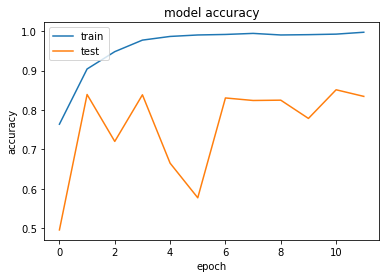

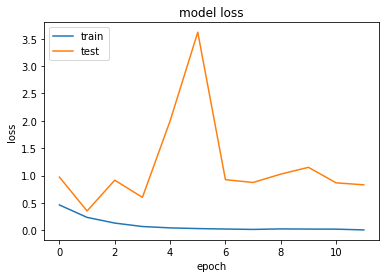

In [13]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Accuracy on test set with optimised CNN

In [ ]:
#remove dropout

In [19]:
dirname = os.path.dirname(d)
csvtest = os.path.join(d, 'test/celeba_test/labels.csv')
dirname = os.path.dirname(d)
imgtest = os.path.join(d, 'test/celeba_test/img/')


In [20]:
#Use Pandas to read csv file
test_dataset = pd.read_csv(csvtest, sep='\\t', engine='python')

test_dataset.head()

,img_name,gender,smiling
0,0.jpg,-1,-1
1,1.jpg,-1,1
2,2.jpg,1,1
3,3.jpg,1,1
4,4.jpg,-1,-1


In [21]:
test_dataset_image = []
for i in tqdm(range(test_dataset.shape[0])):
    img = image.load_img(imgtest+test_dataset['img_name'][i], target_size=(109,89))
    img = img.convert('L')
    img = image.img_to_array(img)
    img = img/255

    test_dataset_image.append(img)

100%|██████████| 1000/1000 [00:02<00:00, 338.20it/s]


In [22]:
# Split the data
X_TEST = np.array(test_dataset_image)
Y_TEST = np.array(test_dataset['smiling']+1)/2

In [27]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='Adam')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(X_TEST, Y_TEST), callbacks=[es])

Epoch 1/100
59/59 [==============================] - 97s 2s/step - loss: 0.3654 - accuracy: 0.8317 - val_loss: 1.2031 - val_accuracy: 0.5170
Epoch 2/100
59/59 [==============================] - 93s 2s/step - loss: 0.1851 - accuracy: 0.9259 - val_loss: 0.4192 - val_accuracy: 0.8070
Epoch 3/100
59/59 [==============================] - 94s 2s/step - loss: 0.0840 - accuracy: 0.9736 - val_loss: 0.3356 - val_accuracy: 0.8570
Epoch 4/100
59/59 [==============================] - 94s 2s/step - loss: 0.0425 - accuracy: 0.9875 - val_loss: 0.7703 - val_accuracy: 0.7970
Epoch 5/100
59/59 [==============================] - 97s 2s/step - loss: 0.0279 - accuracy: 0.9915 - val_loss: 1.4256 - val_accuracy: 0.6830
Epoch 6/100
59/59 [==============================] - 101s 2s/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 1.0682 - val_accuracy: 0.7850
Epoch 7/100
59/59 [==============================] - 93s 2s/step - loss: 0.0098 - accuracy: 0.9979 - val_loss: 0.5138 - val_accuracy: 0.8610
Epoch 8/100
